# Source of Data Sets

#### https://www.kaggle.com/c/rossmann-store-sales/data?select=train.csv

# Guide Packages

In [1]:
!pip install numpy pandas matplotlib seaborn --quiet
import os
import math
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')


from sklearn import metrics
from tensorflow import keras
from datetime import datetime
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install pingouin
import pingouin as pg

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

# Input Dataset


In [2]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/task-in/Task5/Task5-2")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sample_submission = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-2/sample_submission.csv')
store = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-2/store.csv')
train = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-2/train.csv')
test = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-2/test.csv')

In [4]:
print(store.info())
print('\n')
print(train.info())
print('\n')
print(test.info())
print('\n')
print(sample_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    D

In [5]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [6]:
sample_submission.head(3)

,Id,Sales
0,1,0
1,2,0
2,3,0


In [7]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [8]:
test.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [9]:
# print(store.isnull().sum())
# print('\n')
# print(test.isnull().sum())
# print('\n')
# print(sample_submission.isnull().sum())
# print('\n')
# print(train.isnull().sum())

In [10]:
print("store.shape", store.shape)
print("train.shape", train.shape)
print("test.shape", test.shape)
print("sample_submission.shape", sample_submission.shape)

store.shape (1115, 10)
train.shape (1017209, 9)
test.shape (41088, 8)
sample_submission.shape (41088, 2)


# Merging Data Sets


In [11]:
# Merge the information from store_df into train_df and test_df.
#how='inner'
train_df = train.merge(store, how='left', on='Store')  
test_df = test.merge(store, how='left', on='Store')
print("The number of rows and columns is:",(train_df.shape))
print("The number of rows and columns is: ",(test_df.shape))

The number of rows and columns is: (1017209, 18)
The number of rows and columns is:  (41088, 17)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# Preprocessing 

# Convert "Date" Column to Datetime Format

In [13]:
# train_df['Date'] = pd.to_datetime(train_df['Date'])
# train_df['Day'] = train_df['Date'].dt.day
def split_date(df, date):
  df['dt_ref'] = pd.to_datetime(df[date])
  df['year'] = df.dt_ref.dt.year
  df['month'] = df.dt_ref.dt.month
  df['day'] = df.dt_ref.dt.day
  df['week_of_year'] = df.dt_ref.dt.isocalendar().week
  df['period_month'] = df.dt_ref.dt.to_period('M')   #?

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

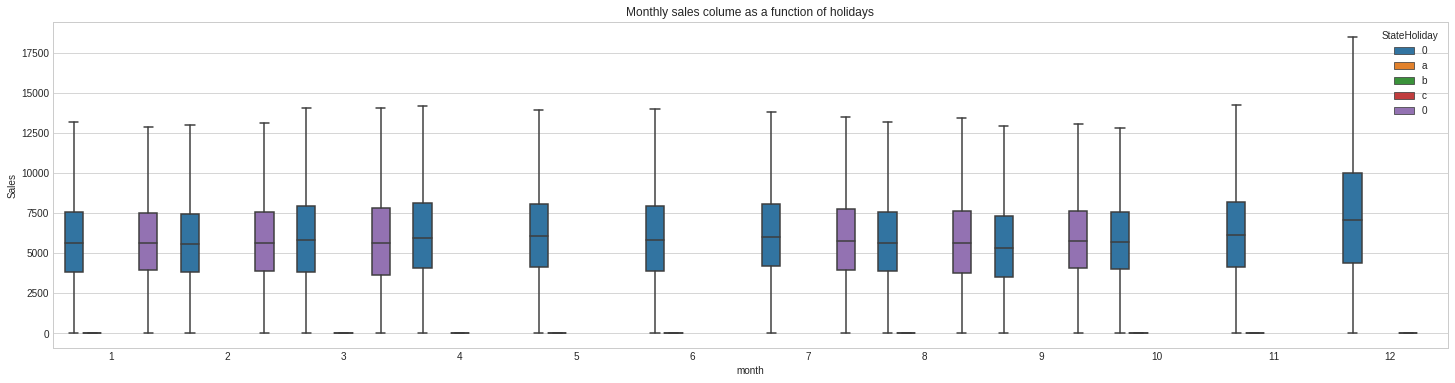

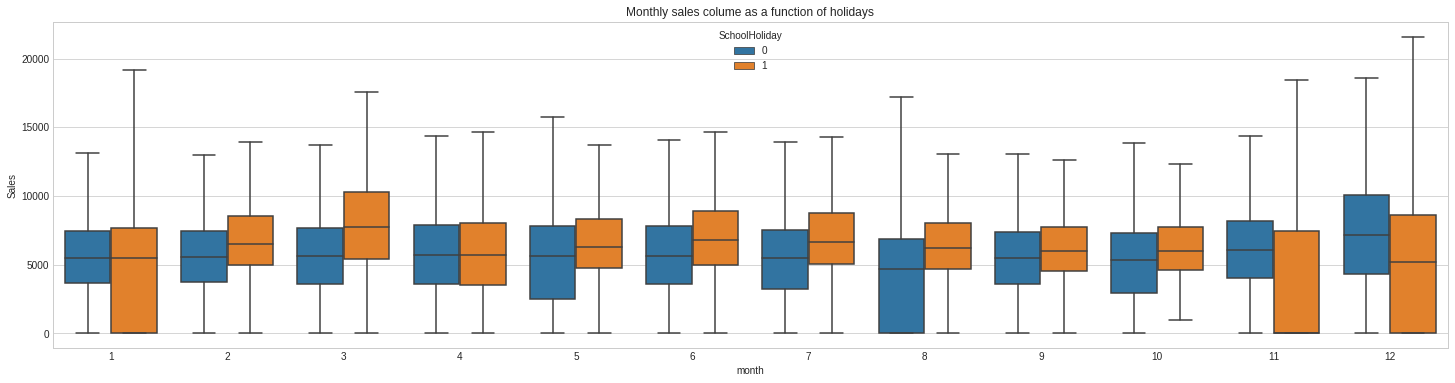

In [15]:
# IsHoliday - whether the week is a special holiday week
# Boxplt: distribution of observation data
'''
A boxplot contains six main data nodes, which arrange a set of data from largest to smallest.
And calculate his upper edge (upper limit), upper quartile Q3, median, lower quartile Q1, lower edge(lower limit).
And an outlier respectively.
'''
split_date(train_df, 'Date')
split_date(test_df, 'Date')

plt.figure(figsize = (25,6))
plt.title ('Monthly sales colume as a function of holidays')
fig = sns.boxplot(x = 'month'
                  ,y = 'Sales'
                  ,data = train_df[['month','Sales','StateHoliday']]
                  ,showfliers = False
                  ,hue = 'StateHoliday')
print('\n')
plt.figure(figsize = (25,6))
plt.title ('Monthly sales colume as a function of holidays')
fig = sns.boxplot(x = 'month'
                  ,y = 'Sales'
                  ,data = train_df[['month','Sales','SchoolHoliday']]
                  ,showfliers = False
                  ,hue = 'SchoolHoliday')

### We can investigate the variation in sales between shops and the extent to which holidays affect sales in each shop

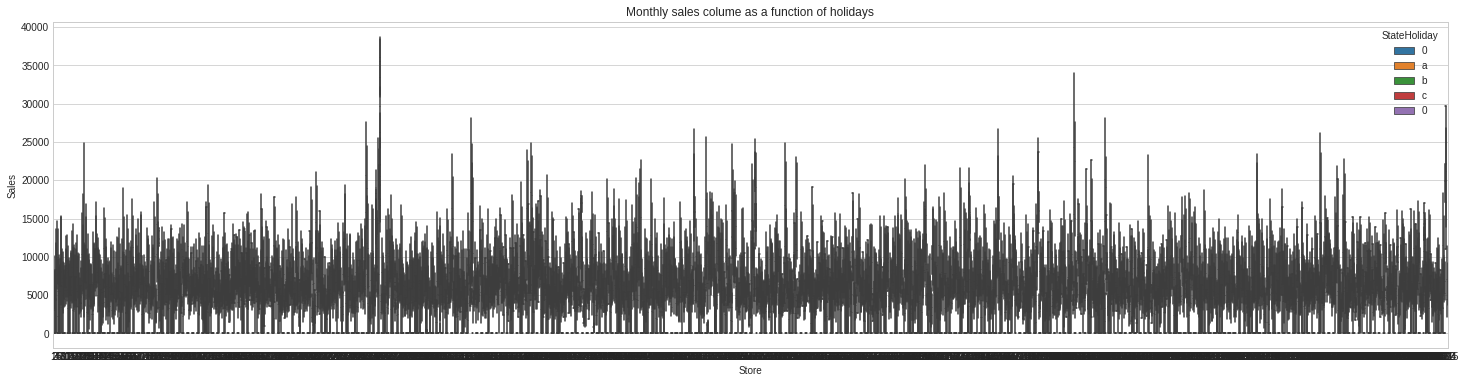

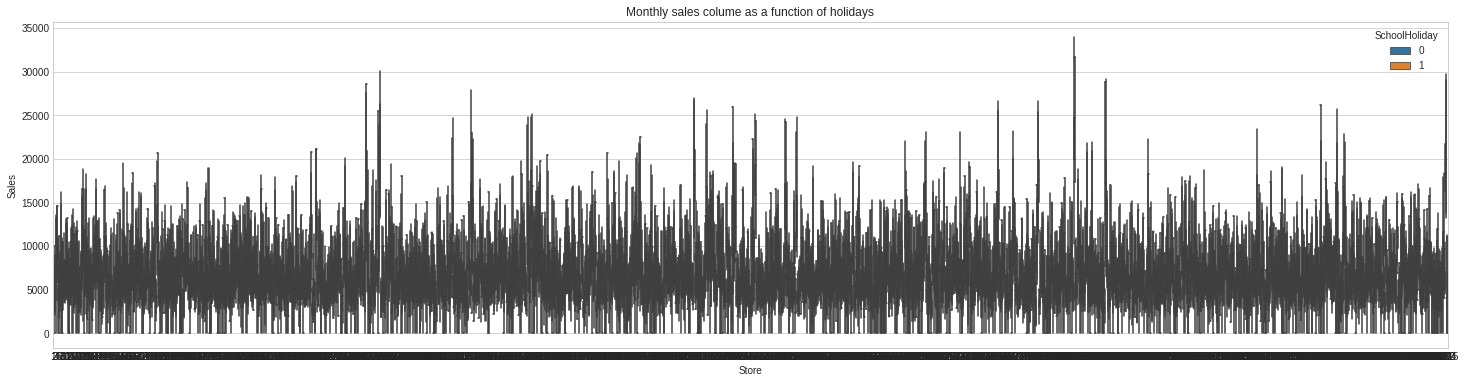

In [16]:
plt.figure(figsize = (25,6))
plt.title ('Monthly sales colume as a function of holidays')
fig = sns.boxplot(x = 'Store'
                  ,y = 'Sales'
                  ,data = train_df[['Store','Sales','StateHoliday']]
                  ,showfliers = False
                  ,hue = 'StateHoliday')
print('\n')
plt.figure(figsize = (25,6))
plt.title ('Monthly sales colume as a function of holidays')
fig = sns.boxplot(x = 'Store'
                  ,y = 'Sales'
                  ,data = train_df[['Store','Sales','SchoolHoliday']]
                  ,showfliers = False
                  ,hue = 'SchoolHoliday')

In [17]:
# Missing values
#train_df.isna().sum()
print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dt_ref                            0
year                              0
month                             0
day                               0
week_of_year                      0
period_month                      0
dtype: int64


Id                               0
Store                            0
DayOfWeek                        0
Date            

## Open/Closed

In [18]:
train_df[train_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [19]:
Train_Open_df = train_df[train_df.Open == 1].copy()

In [20]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.year - df.CompetitionOpenSinceYear) + (df.month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [21]:
comp_months(Train_Open_df)
comp_months(test_df)

### Additional Promotion

In [23]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.year - df.Promo2SinceYear) +  (df.week_of_year  - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [24]:
promo_cols(Train_Open_df)
promo_cols(test_df)

In [26]:
# Missing values in 'train_df' and 'test_df' are filled in with '0' values
# However, in 'test_df' and 'train_df, CompetitionDistance are filled in with averages
# train_df,test_df

train_df['CompetitionDistance'].fillna(train_df['CompetitionDistance'].mean(),inplace = True)
test_df['CompetitionDistance'].fillna(test_df['CompetitionDistance'].mean(),inplace = True)
train_df.fillna(0, inplace = True)
test_df.fillna(0, inplace = True)

print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dt_ref                       0
year                         0
month                        0
day                          0
week_of_year                 0
period_month                 0
dtype: int64


Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday           

In [28]:
target = ['Sales']
numeric_col = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categorical_col = ['DayOfWeek', 'period_month','month', 'year', 'StoreType', 'Assortment', 'week_of_year']

def create_encode(df, col):
    le = LabelEncoder()
    a = le.fit_transform(train_df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    col_names = [col+ "_" + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns = col_names))

In [29]:
temp = train_df[numeric_col]

for col in categorical_col:
    temp_df = create_encode(train_df, col)
    temp = pd.concat([temp, temp_df], axis=1)

In [30]:
print('Shape of Data: ', temp.shape)
print('Distinct Datatypes: ', temp.dtypes.unique())

Shape of Data:  (1017209, 119)
Distinct Datatypes:  [dtype('int64') dtype('O') dtype('float64')]


In [31]:
temp['StateHoliday'] = np.where(temp['StateHoliday']=='0', 0,1)
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(temp, train_df[target], test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [33]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (732390, 119)
Shape of X_val:  (81377, 119)
Shape of X_test:  (203442, 119)
Shape of y_train:  (732390, 1)
Shape of y_val:  (81377, 1)
Shape of y_test:  (203442, 1)


# Build Model

In [35]:
model = Sequential()
model.add(Dense(350, input_dim=119, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               42000     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_2 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_3 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 351       
Total params: 410,901
Trainable params: 410,901
Non-trainable params: 0
_________________________________________________________________


# Train the Model

In [40]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/10
18310/18310 [==============================] - 75s 4ms/step - loss: 5770.4238 - mean_absolute_error: 5770.4238 - val_loss: 5774.5376 - val_mean_absolute_error: 5774.5376
Epoch 2/10
18310/18310 [==============================] - 71s 4ms/step - loss: 5770.4414 - mean_absolute_error: 5770.4414 - val_loss: 5774.5376 - val_mean_absolute_error: 5774.5376
Epoch 3/10
18310/18310 [==============================] - 73s 4ms/step - loss: 5770.4131 - mean_absolute_error: 5770.4131 - val_loss: 5774.5376 - val_mean_absolute_error: 5774.5376
Epoch 4/10
18310/18310 [==============================] - 73s 4ms/step - loss: 5770.4224 - mean_absolute_error: 5770.4224 - val_loss: 5774.5376 - val_mean_absolute_error: 5774.5376
Epoch 5/10
18310/18310 [==============================] - 73s 4ms/step - loss: 5770.4395 - mean_absolute_error: 5770.4395 - val_loss: 5774.5376 - val_mean_absolute_error: 5774.5376
Epoch 6/10
18310/18310 [==============================] - 73s 4ms/step - loss: 5770.4565 - mean

## Evaluate Model on Test Data

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

6358/6358 [==============================] - 15s 2ms/step - loss: 5777.6841 - mean_absolute_error: 5777.6841
Test accuracy 5777.68408203125
Test loss 5777.68408203125


In [42]:
prediction = model.predict(X_test)
print(prediction)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


## Plot the Model's Training and Validation Loss

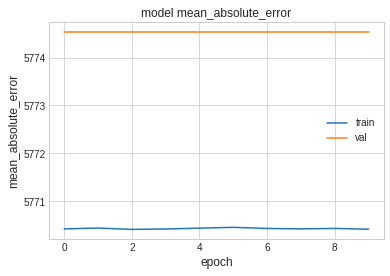

In [43]:
metric = "mean_absolute_error"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()